# Ejercicio de _k-means_

El funcionamiento del algoritmo de _$k$-means clustering_ se demostrará en una Jupyter Notebook usando Python 3.8 y la librería `scikit-learn`, la cual implementa diversos algoritmos y técnicas de aprendizaje máquina.

Lo primero que haremos será obtener datos de muestra para proceder a demostrar la implementación del algoritmo. Generaremos 3000 puntos con coordenadas $(x, y)$ aleatorias "divididos" en seis grupos con desviación estándar de $3$ para que estén más o menos dispersos:

In [4]:
from sklearn.datasets import make_blobs

data, _ = make_blobs(
    n_samples=3000,
    centers=6,
    cluster_std=3
)
# mostrar primeros 10 para no ocupar mucho espacio
data[:10]

array([[ -0.25973713,  11.39181335],
       [ -0.03304063,   8.08631262],
       [  4.7427313 ,   5.11757953],
       [ -4.33588352,   6.15893856],
       [-11.36018163,  -9.39974341],
       [ -7.49250374,   6.67412976],
       [  3.63282705,   8.96127128],
       [-11.25989404,   2.65663557],
       [ -5.98207126,  -6.31729579],
       [ -0.30515058,   9.33413082]])

$\pagebreak$

Vamos a visualizar los datos generados usando la librería `matplotlib` que nos permite graficar:

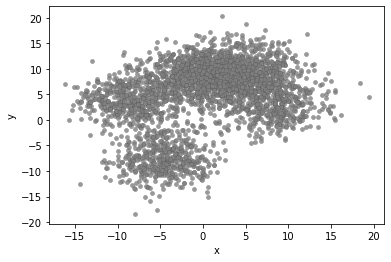

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# separar coordenadas en x, y
data_x = data[:, 0]
data_y = data[:, 1]

def plot_data(color):
    plt.scatter(data_x, data_y, s=20, c=color, edgecolor='black', linewidth=0.1, alpha=0.8)
plot_data('gray')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

$\pagebreak$

Ahora importaremos la clase que nos permitirá aplicar el algoritmo de $k$-medias sobre los datos generados y agruparlos en 3 clusters:

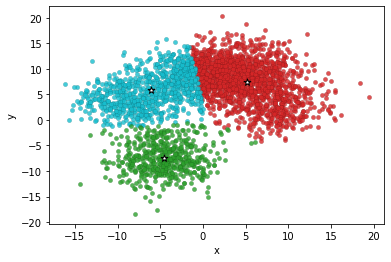

In [9]:
import random

from sklearn.cluster import KMeans
from matplotlib.colors import TABLEAU_COLORS

kmeans = KMeans(n_clusters=3).fit(data)

# obtener las coordenadas de los centroides
centers_x = kmeans.cluster_centers_[:, 0]
centers_y = kmeans.cluster_centers_[:, 1]

labels = kmeans.labels_

# usar colores al azar
clusters_colors = random.sample(list(TABLEAU_COLORS), 3)
for k, color in enumerate(clusters_colors):
    clustered_data = labels == k
    data_x = data[clustered_data, 0]
    data_y = data[clustered_data, 1]
    plot_data(color)

plt.scatter(centers_x, centers_y, marker='*', s=50, c='white', edgecolor='black')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

Como se puede observar, la implementación del algoritmo de $k$-medias calculó los 3 centroides representados en la gráfica con estrellas blancas, y cada punto se graficó con un color único para cada cluster.